In [1]:
import decimal
from collections.abc import Callable
import matplotlib.pyplot as plt

In [2]:
decimal.setcontext(decimal.Context(prec=30))

In [3]:
class EulerEq:
    def __init__(self, x0: float, y0: float,
                 step: float, otrezok: list[float, float],
                 func: Callable[[float, float], float]):
        self.x0 = x0
        self.y0 = y0
        self.step = decimal.Decimal(step)
        self.start_point = otrezok[0]
        self.end_point = otrezok[1]
        self.func = func
        self.x_points = []
        self.y_points = []

    def counting_points(self):
        x, y, i = [decimal.Decimal(v) for v in (self.x0, self.y0, self.x0)]
        if x > self.start_point:
            while i > self.start_point:     
                x = x - self.step
                y = y - self.step * decimal.Decimal(self.func(x, y))          
                if self.start_point <= x <= self.end_point:
                    self.x_points.append(x)
                    self.y_points.append(y)
                i = i - self.step
            self.x_points = self.x_points[::-1]
            self.y_points = self.y_points[::-1]
        if self.start_point <= self.x0 <= self.end_point:
            self.x_points.append(self.x0)
            self.y_points.append(self.y0)
        x, y, i = [decimal.Decimal(v) for v in (self.x0, self.y0, self.x0)]
        while i <= self.end_point:     
            x = x + self.step
            y = y + self.step * decimal.Decimal(self.func(x, y))          
            if self.start_point <= x <= self.end_point:
                self.x_points.append(x)
                self.y_points.append(y)
            i = i + self.step
        return self.x_points, self.y_points


In [8]:
def func_115(x, y):
    return (y - x + 1) / (y - x + 2)

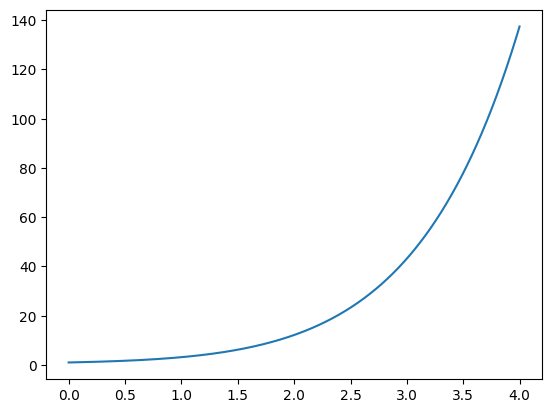

In [9]:
A = EulerEq(x0 = 0, y0 = 1, step = 0.001, otrezok = [0.0, 4.0], func = func_115)
x, y = A.counting_points()
fig, ax = plt.subplots()
ax.plot(x, y)

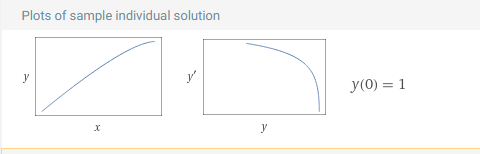

In [6]:
def func_137(x, y):
    return (4*x/(2*x+1)) + (2*y/(2*x+1))

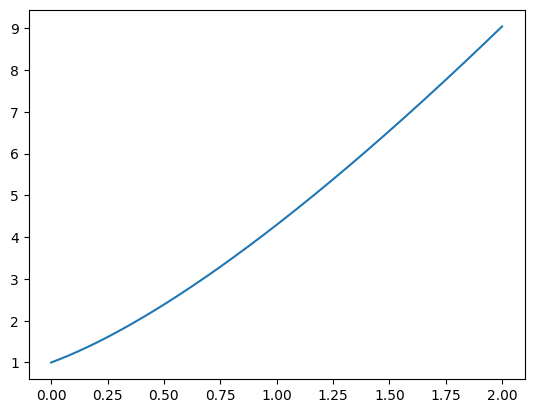

In [7]:
B = EulerEq(x0 = 0, y0 = 1, step = 0.0001, otrezok = [0, 2], func = func_137)
x, y = B.counting_points()
fig, ax = plt.subplots()
ax.plot(x, y)

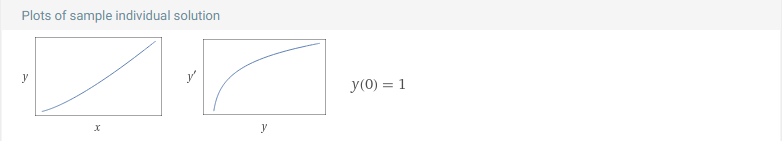